In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("data.xlsx")
cc = pd.read_excel("Country-Code.xlsx")

In [3]:
datam = data.merge(cc, how='left', on='Country Code')

In [4]:
datam

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",0,Indian Rupees(Rs.),No,No,1,4.3,Green,Very Good,63,India
9547,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,1,3.6,Yellow,Good,34,India
9548,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,127,India
9549,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,0,Indian Rupees(Rs.),No,No,1,3.8,Yellow,Good,78,India


In [5]:
datam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [6]:
datam.isnull().sum(axis=0)

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [7]:
datam = datam.rename({'Restaurant ID':'Restaurant_ID','Restaurant Name':'Restaurant_Name', 'Country Code':'Country_Code', 'Locality Verbose':'Locality_Verbose', 'Average Cost for two': 'Average_Cost_for_two', 'Has Table booking':'Has_Table_booking','Has Online delivery':'Has_Online_delivery', 'Price range': 'Price_range','Aggregate rating':'Aggregate_rating','Rating color':'Rating_color','Rating text':'Rating_text'}, axis=1)
datam.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [8]:
datam[datam['Restaurant_Name'].isnull()]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
1646,113702,NaN,1,Ahmedabad,"Opposite Sindhu Bhawan, Bodakdev, Ahmedabad",Bodakdev,"Bodakdev, Ahmedabad",72.501764,23.040163,"North Indian, Continental, Mexican, Italian",800,Indian Rupees(Rs.),No,No,3,4.1,Green,Very Good,769,India


In [9]:
datam[datam['Cuisines'].isnull()]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
9083,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,3,3.9,Yellow,Good,209,United States
9086,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,3,3.8,Yellow,Good,102,United States
9094,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,3,4.4,Green,Very Good,1158,United States
9406,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,160,United States
9494,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,1,4.7,Dark Green,Excellent,707,United States
9504,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,309,United States
9533,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,34,United States
9535,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,36,United States
9539,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,11,United States


In [10]:
datam.dropna(axis=0, how='any',subset=['Restaurant_Name'], inplace=True)

In [11]:
datam.isnull().sum(axis=0)

Restaurant_ID           0
Restaurant_Name         0
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

In [12]:
datam

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",0,Indian Rupees(Rs.),No,No,1,4.3,Green,Very Good,63,India
9547,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,1,3.6,Yellow,Good,34,India
9548,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,127,India
9549,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,0,Indian Rupees(Rs.),No,No,1,3.8,Yellow,Good,78,India


In [13]:
## datam.loc[1646] ##now data is deleted but the empty location exist so we need to reset it

In [14]:
datam.reset_index(drop=True,inplace=True) ##now 1647 data is set to 1646 blank location (no empty location left)

In [15]:
datam.loc[1646]

Restaurant_ID                                                  2400403
Restaurant_Name                                          Pind Balluchi
Country_Code                                                         1
City                                                         Allahabad
Address                 5-A, Sardar Patel Marg, Civil Lines, Allahabad
Locality                                                   Civil Lines
Locality_Verbose                                Civil Lines, Allahabad
Longitude                                                            0
Latitude                                                             0
Cuisines                                         North Indian, Mughlai
Average_Cost_for_two                                               800
Currency                                            Indian Rupees(Rs.)
Has_Table_booking                                                   No
Has_Online_delivery                                                 No
Price_

In [16]:
datam['Cuisines'].fillna('others',inplace=True)

In [17]:
datam.isnull().sum()

Restaurant_ID           0
Restaurant_Name         0
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

# Explore the geographical distribution of the restaurants and identify the cities with the maximum and minimum number of restaurants

# Restaurant franchising is a thriving venture. So, it is very important to explore the franchise with most national presence

In [18]:
cntry_dist = datam.groupby(['Country_Code','Country']).agg( Count = ('Restaurant_Name','count')) 
city_dist = datam.groupby(['Country_Code','City']).agg( Count = ('Restaurant_ID','count')) 
city_dist.describe()

,Count
count,141.000000
mean,67.730496
std,476.723952
min,1.000000
25%,1.000000
50%,20.000000
75%,20.000000
max,5473.000000





cntry_dist = datam.groupby(['Country_Code','Country']).agg( Count = ('Restaurant_Name','count'))
city_dist = datam.groupby(['Country_Code','City']).agg( Count = ('Restaurant_ID','count'))
city_dist.describe()

<AxesSubplot:ylabel='Country_Code,Country'>

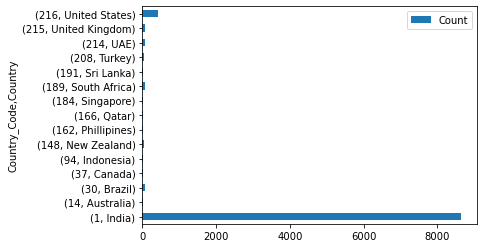

In [19]:
cntry_dist.plot(kind='barh')


In [20]:
datam.City.describe()

count          9550
unique          141
top       New Delhi
freq           5473
Name: City, dtype: object

In [21]:
datam.groupby(['Country_Code', 'City']).agg(['count'])

Restaurant_ID Restaurant_Name Address Locality  \
                                    count           count   count    count   
Country_Code City                                                            
1            Agra                      20              20      20       20   
             Ahmedabad                 20              20      20       20   
             Allahabad                 20              20      20       20   
             Amritsar                  21              21      21       21   
             Aurangabad                20              20      20       20   
...                                   ...             ...     ...      ...   
216          Valdosta                  20              20      20       20   
             Vernonia                   1               1       1        1   
             Waterloo                  20              20      20       20   
             Weirton                    1               1       1        1   
             Winchester Bay             1               1       1        1   

                            Locality_Verbose Longitude Latitude Cuisines  \
                                       count     count    count    count   
Country_Code City                                                          
1            Agra                         20        20       20       20   
             Ahmedabad                    20        20       20       20   
             Allahabad                    20        20       20       20   
             Amritsar                     21        21       21       21   
             Aurangabad                   20        20       20       20   
...                                      ...       ...      ...      ...   
216          Valdosta                     20        20       20       20   
             Vernonia                      1         1        1        1   
             Waterloo                     20        20       20       20   
             Weirton                       1         1        1        1   
             Winchester Bay                1         1        1        1   

                            Average_Cost_for_two Currency Has_Table_booking  \
                                           count    count             count   
Country_Code City                                                             
1            Agra                             20       20                20   
             Ahmedabad                        20       20                20   
             Allahabad                        20       20                20   
             Amritsar                         21       21                21   
             Aurangabad                       20       20                20   
...                                          ...      ...               ...   
216          Valdosta                         20       20                20   
             Vernonia                          1        1                 1   
             Waterloo                         20       20                20   
             Weirton                           1        1                 1   
             Winchester Bay                    1        1                 1   

                            Has_Online_delivery Price_range Aggregate_rating  \
                                          count       count            count   
Country_Code City                                                              
1            Agra                            20          20               20   
             Ahmedabad                       20          20               20   
             Allahabad                       20          20               20   
             Amritsar                        21          21               21   
             Aurangabad                      20          20               20   
...                                         ...         ...              ...   
216          Valdosta                      

In [22]:
datam.groupby(['Country_Code', 'City']).size()

Country_Code  City          
1             Agra              20
              Ahmedabad         20
              Allahabad         20
              Amritsar          21
              Aurangabad        20
                                ..
216           Valdosta          20
              Vernonia           1
              Waterloo          20
              Weirton            1
              Winchester Bay     1
Length: 141, dtype: int64

# Find out the ratio between restaurants that allow table booking vs. those that do not allow table booking

# Find out the percentage of restaurants providing online delivery

In [23]:
##Find out the ratio between restaurants that allow table booking vs. those that do not allow table booking

hasty = datam['Has_Table_booking'].value_counts()['Yes']
hastn = datam['Has_Table_booking'].value_counts()['No']
TBRatio = round((hasty/hastn),2)
TBRatio

0.14

In [24]:
hastb = datam.groupby(['Has_Table_booking']).agg(count= ('Restaurant_ID','count'))
hastb

,count
Has_Table_booking,
No,8392
Yes,1158


<AxesSubplot:ylabel='Has_Table_booking'>

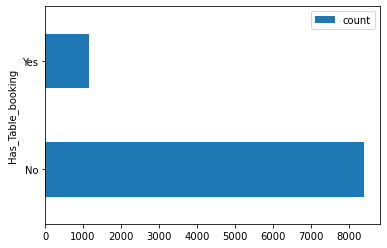

In [25]:
hastb.plot(kind='barh')

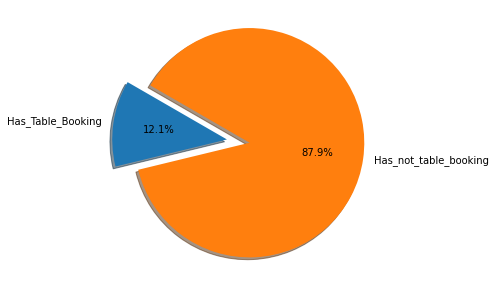

In [26]:
labels = 'Has_Table_Booking', 'Has_not_table_booking'
sizes = [hasty,hastn]
explode = (0,0.2)
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%2.1f%%',
        shadow=True, startangle=150)
ax1.axis('equal')  

plt.show()


In [27]:
## Find out the percentage of restaurants providing online delivery
Yodelivery = datam['Has_Online_delivery'].value_counts()['Yes']
Nodelivery = datam['Has_Online_delivery'].value_counts()['No']
OnlinetbRation =round((Yodelivery/Nodelivery),2) 
OnlinetbRation 

0.35

<AxesSubplot:ylabel='Has_Online_delivery'>

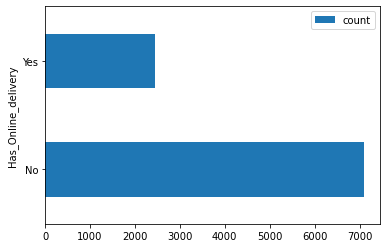

In [28]:
Online_Delivery = datam.groupby(['Has_Online_delivery']).agg(count= ('Restaurant_ID', 'count'))
Online_Delivery.plot(kind='barh')

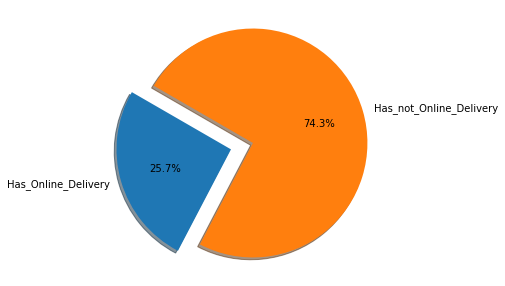

In [29]:
labels = 'Has_Online_Delivery', 'Has_not_Online_Delivery'
sizes = [Yodelivery,Nodelivery]
explode = (0,0.2)
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%2.1f%%',
        shadow=True, startangle=150)
ax1.axis('equal')  

plt.show()


In [30]:
Online_Delivery_votes = datam.groupby(['Has_Online_delivery']).agg(Sum=('Votes','sum'))
Online_Delivery_votes

,Sum
Has_Online_delivery,
No,979962
Yes,517914


In [31]:
min_votes = Online_Delivery_votes.agg(min =('Sum','min'))
max_votes = Online_Delivery_votes.agg(max =('Sum','max'))

In [32]:
data_bookings = datam.copy()

data_bookings.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [33]:
dummy = ['Has_Table_booking','Has_Online_delivery']
data_bookings =pd.get_dummies(data_bookings,columns=dummy,drop_first=True)
data_bookings


,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country,Has_Table_booking_Yes,Has_Online_delivery_Yes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),3,4.1,Green,Very Good,1498,Indonesia,0,0
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),3,4.6,Dark Green,Excellent,873,Indonesia,0,0
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),3,4.9,Dark Green,Excellent,605,Indonesia,0,0
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),3,4.2,Green,Very Good,395,Indonesia,0,0
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),3,4.3,Green,Very Good,243,Indonesia,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",0,Indian Rupees(Rs.),1,4.3,Green,Very Good,63,India,0,0
9546,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",0,Indian Rupees(Rs.),1,3.6,Yellow,Good,34,India,0,0
9547,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,Indian Rupees(Rs.),1,3.9,Yellow,Good,127,India,0,0
9548,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,0,Indian Rupees(Rs.),1,3.8,Yellow,Good,78,India,0,0


## Calculate the difference in number of votes for the restaurants that deliver and the restaurants that do not deliver



In [34]:
Yes_votes = data_bookings[data_bookings['Has_Online_delivery_Yes'] == 1]['Votes'].sum()
No_votes = data_bookings[data_bookings['Has_Online_delivery_Yes'] == 0]['Votes'].sum()
print("Difference in number of votes for the restaurants that deliver and the restaurants that do not deliver : ", abs(Yes_votes - No_votes))

Difference in number of votes for the restaurants that deliver and the restaurants that do not deliver :  462048


In [35]:
cuisines_new = datam[datam['Cuisines'].notnull()]
cuisines_new

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",0,Indian Rupees(Rs.),No,No,1,4.3,Green,Very Good,63,India
9546,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,1,3.6,Yellow,Good,34,India
9547,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,127,India
9548,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,0,Indian Rupees(Rs.),No,No,1,3.8,Yellow,Good,78,India


In [36]:
split1 = lambda x: pd.Series(x.split(','))


In [37]:
cuisines = cuisines_new['Cuisines'].apply(split1)
cuisines.columns=['Cuisine1','Cuisine2','Cuisine3','Cuisine4','Cuisine5','Cuisine6','Cuisine7','Cuisine8']
cuisines.head()

,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8
0,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
concatting = pd.concat([cuisines_new,cuisines],axis = 1)
concatting

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Votes,Country,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,1498,Indonesia,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,873,Indonesia,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,605,Indonesia,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,395,Indonesia,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,243,Indonesia,French,Western,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",...,63,India,Chinese,North Indian,Fast Food,NaN,NaN,NaN,NaN,NaN
9546,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",...,34,India,Indian,Chinese,Continental,NaN,NaN,NaN,NaN,NaN
9547,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",...,127,India,Cafe,Continental,Desserts,Ice Cream,Italian,Beverages,NaN,NaN
9548,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,...,78,India,Street Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
new_data1 = pd.DataFrame(concatting[['Locality_Verbose','Cuisine1','Cuisine2','Cuisine3','Cuisine4','Cuisine5','Cuisine6','Cuisine7','Cuisine8' ]])
new_data1.head()

,Locality_Verbose,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8
0,"Grand Indonesia Mall, Thamrin, Jakarta",Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,"Hotel Shangri-La, Sudirman, Jakarta",Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,"Penjaringan, Jakarta",Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,"Senopati, Jakarta",Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Thamrin, Jakarta",French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
locality_stack=pd.DataFrame(new_data1.stack()) #stacking the columns 
new_data1.head()

,Locality_Verbose,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8
0,"Grand Indonesia Mall, Thamrin, Jakarta",Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,"Hotel Shangri-La, Sudirman, Jakarta",Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,"Penjaringan, Jakarta",Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,"Senopati, Jakarta",Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Thamrin, Jakarta",French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
keys = [c for c in new_data1  if c.startswith('Cuisine')]
a = pd.melt(new_data1, id_vars=['Locality_Verbose'], value_vars=keys,value_name='Cuisines')
a.head()

,Locality_Verbose,variable,Cuisines
0,"Grand Indonesia Mall, Thamrin, Jakarta",Cuisine1,Italian
1,"Hotel Shangri-La, Sudirman, Jakarta",Cuisine1,Asian
2,"Penjaringan, Jakarta",Cuisine1,Sushi
3,"Senopati, Jakarta",Cuisine1,Japanese
4,"Thamrin, Jakarta",Cuisine1,French


In [42]:
new_data2  = pd.DataFrame(a.groupby(by=['Locality_Verbose', 'variable','Cuisines']).size().reset_index())
new_data2


,Locality_Verbose,variable,Cuisines,0
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cuisine1,Cafe,1
1,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cuisine1,North Indian,1
2,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cuisine2,Beverages,1
3,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cuisine2,Mughlai,1
4,"12th Square Building, Banjara Hills, Hyderabad",Cuisine1,Mughlai,1
...,...,...,...,...
10769,"ÌÏmitkÌ_y, Ankara",Cuisine3,Turkish Pizza,1
10770,"Ìàayyolu, Ankara",Cuisine1,Cafe,1
10771,"Ìàayyolu, Ankara",Cuisine2,Desserts,1
10772,"Ìàukurambar, Ankara",Cuisine1,Patisserie,1


In [43]:
del new_data2['variable']
new_data2.columns=['Locality_Verbose','Cuisines','Count']
new_data2.head()


,Locality_Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"ILD Trade Centre Mall, Sohna Road, Gurgaon",North Indian,1
2,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Beverages,1
3,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Mughlai,1
4,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1


In [44]:
loc = new_data2.sort_values('Count',ascending= False).groupby(['Locality_Verbose'], as_index= False).first()
loc

,Locality_Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1
2,"A Hotel, Gurdev Nagar, Ludhiana",Chinese,1
3,"ARSS Mall, Paschim Vihar, New Delhi",North Indian,1
4,"Aaya Nagar, New Delhi",Cuisine Varies,1
...,...,...,...
1260,"ibis New Delhi, Aerocity, New Delhi",Desserts,1
1261,"ÌÅguas Claras, BrasÌ_lia",Bar Food,1
1262,"ÌÏmitkÌ_y, Ankara",Kebab,1
1263,"Ìàayyolu, Ankara",Cafe,1


In [45]:
rating_res = loc.merge(cuisines_new, left_on = 'Locality_Verbose', right_on = 'Locality_Verbose', how= 'inner')
df=pd.DataFrame(rating_res[['Country','City','Locality_Verbose','Cuisines_x','Count']]) 
rating_res 

,Locality_Verbose,Cuisines_x,Count,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Longitude,...,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1,18237941,Pind Balluchi,1,Gurgaon,"112/112-A, 1st Floor, ILD Trade Centre, Near S...","ILD Trade Centre Mall, Sohna Road",77.039220,...,800,Indian Rupees(Rs.),Yes,Yes,2,2.7,Orange,Average,80,India
1,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1,18396451,K Lab,1,Gurgaon,"Shop GF-18, ILD Trade Centre, Sector 47, Near ...","ILD Trade Centre Mall, Sohna Road",77.039310,...,350,Indian Rupees(Rs.),No,No,1,3.4,Orange,Average,16,India
2,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1,90744,Exotica,1,Hyderabad,"Opposite Audi Showroom, 5th Floor, 12th Square...","12th Square Building, Banjara Hills",78.437225,...,1500,Indian Rupees(Rs.),Yes,Yes,3,4.3,Green,Very Good,3374,India
3,"A Hotel, Gurdev Nagar, Ludhiana",Chinese,1,15239,Basant Restaurant,1,Ludhiana,"Urban Estate, Main Market, Phase 1, Dugri, Lud...","A Hotel, Gurdev Nagar",75.842739,...,800,Indian Rupees(Rs.),No,No,2,3.6,Yellow,Good,93,India
4,"ARSS Mall, Paschim Vihar, New Delhi",North Indian,1,310281,Haldiram's,1,New Delhi,"1st Floor, ARSS Mall, Opposite Jwalaheri, Pasc...","ARSS Mall, Paschim Vihar",77.101544,...,500,Indian Rupees(Rs.),No,No,2,3.1,Orange,Average,117,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,"ÌÅguas Claras, BrasÌ_lia",Bar Food,1,6601602,Taco Pep,30,BrasÌ_lia,"Vila Malls, Avenida das Castanheiras, Lote 106...",ÌÅguas Claras,-48.016667,...,100,Brazilian Real(R$),No,No,4,4.3,Green,Very Good,29,Brazil
9546,"ÌÅguas Claras, BrasÌ_lia",Bar Food,1,6601361,Buena Carne,30,BrasÌ_lia,"Avenida AraucÌÁrias, 1325, Loja 19, ÌÅguas Cla...",ÌÅguas Claras,-48.019092,...,60,Brazilian Real(R$),No,No,3,3.6,Yellow,Good,9,Brazil
9547,"ÌÏmitkÌ_y, Ankara",Kebab,1,6000921,DÌ_vero€Ùlu,208,Ankara,"ÌÏmitkÌ_y Mahallesi, 2432. Cadde (8. Cadde), N...",ÌÏmitkÌ_y,32.701775,...,70,Turkish Lira(TL),No,No,3,4.2,Green,Very Good,152,Turkey
9548,"Ìàayyolu, Ankara",Cafe,1,6004408,Turta Home Cafe,208,Ankara,"Mutlukent Mahallesi, 1944. Cadde, 1948. Sokak,...",Ìàayyolu,32.704742,...,35,Turkish Lira(TL),No,No,2,4.3,Green,Very Good,126,Turkey


In [46]:
country = rating_res.sort_values('Count', ascending = False).groupby(by=['Country'], as_index = False).first()

country.head(5)

,Country,Locality_Verbose,Cuisines_x,Count,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,...,Cuisines_y,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,Australia,"Victor Harbor, Victor Harbor",Coffee and Tea,1,16608209,Anchorage Cafe Restaurant Wine Bar,14,Victor Harbor,"21 Flinders Parade, Victor Harbor, SA",Victor Harbor,...,"Coffee and Tea, Tapas, Australian",20,Dollar($),No,No,2,3.6,Yellow,Good,96
1,Brazil,"Ipanema, Rio de Janeiro",Brazilian,3,7300521,Balada Mix,30,Rio de Janeiro,"Rua AnÌ_bal de MendonÌ_a, 37, Ipanema, Rio de ...",Ipanema,...,"Brazilian, Healthy Food, Juices, Pizza",90,Brazilian Real(R$),No,No,3,4.6,Dark Green,Excellent,21
2,Canada,"Vineland Station, Vineland Station",Italian,1,16654702,Lake House Restaurant,37,Vineland Station,"3100 N Service Rd, Vineland Station, ON L0R2E0",Vineland Station,...,"Italian, Mediterranean, Pizza",70,Dollar($),No,No,4,4.3,Green,Very Good,204
3,India,"Connaught Place, New Delhi",North Indian,48,1800,Veda,1,New Delhi,"H-27, Outer Circle, Connaught Place, New Delhi",Connaught Place,...,"North Indian, Mughlai",1600,Indian Rupees(Rs.),Yes,Yes,3,3.9,Yellow,Good,1087
4,Indonesia,"Tebet, Jakarta",Western,1,18408381,Fish Streat,94,Jakarta,"Jl. Tebet Timur Dalam Raya 44B, Tebet, Jakarta",Tebet,...,"Seafood, Western",100000,Indonesian Rupiah(IDR),No,No,3,4.0,Green,Very Good,331


# What are the top 10 cuisines served across cities?

## What is the maximum and minimum number of cuisines that a restaurant serves? Also, which is the most served cuisine across the restaurant for each city?



In [47]:

con=pd.DataFrame(country[['Country','City','Locality','Cuisines_x','Count']])
con.columns=['Country','City','Locality','Cuisines','Number of restaurants in the country']
con = con.sort_values('Number of restaurants in the country', ascending = False)
con

,Country,City,Locality,Cuisines,Number of restaurants in the country
3,India,New Delhi,Connaught Place,North Indian,48
14,United States,Dubuque,Dubuque,American,9
5,New Zealand,Wellington City,Te Aro,Cafe,5
1,Brazil,Rio de Janeiro,Ipanema,Brazilian,3
6,Phillipines,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",Japanese,2
8,Singapore,Singapore,"Marina Centre, Downtown Core",Seafood,2
9,South Africa,Cape Town,Green Point,Grill,2
10,Sri Lanka,Colombo,"Cinnamon Gardens, Colombo 07",Cafe,2
11,Turkey,Ankara,Gazi Osman PaÅÙa,World Cuisine,2
12,UAE,Abu Dhabi,"Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)",American,2


In [48]:
final_con=con.drop(con.index[[7,10]])
final_con


,Country,City,Locality,Cuisines,Number of restaurants in the country
3,India,New Delhi,Connaught Place,North Indian,48
14,United States,Dubuque,Dubuque,American,9
5,New Zealand,Wellington City,Te Aro,Cafe,5
1,Brazil,Rio de Janeiro,Ipanema,Brazilian,3
6,Phillipines,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",Japanese,2
8,Singapore,Singapore,"Marina Centre, Downtown Core",Seafood,2
9,South Africa,Cape Town,Green Point,Grill,2
11,Turkey,Ankara,Gazi Osman PaÅÙa,World Cuisine,2
12,UAE,Abu Dhabi,"Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)",American,2
0,Australia,Victor Harbor,Victor Harbor,Coffee and Tea,1


In [49]:
count_list=final_con['Number of restaurants in the country']# converting the series to dataframe
c_list=count_list.tolist()

loc_list=final_con['City'] #converting the series to dataframe
a_list=loc_list.tolist()

cui_list=final_con['Cuisines']# converting the series to dataframe
b_list=cui_list.tolist()

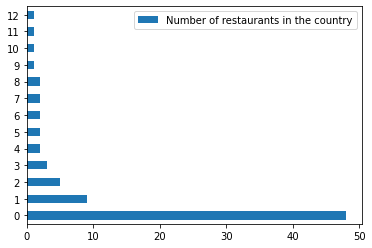

In [50]:
df = pd.DataFrame({'City': a_list,'Number of restaurants in the country': c_list
                   })
ax = df.plot.barh()

## What is the maximum and minimum number of cuisines that a restaurant serves? 


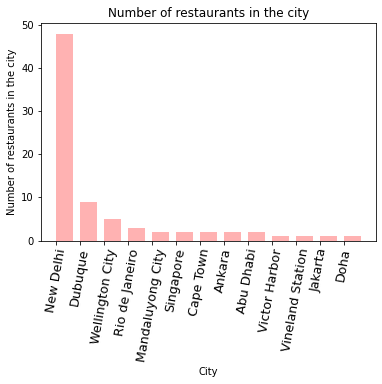

In [51]:
y_pos = np.arange(len(a_list))
plt.bar(y_pos, c_list, align='edge',width =0.7,color = 'red', alpha=0.3)
plt.xticks(y_pos, a_list,  rotation=80, 
    horizontalalignment='center',
    fontweight='light',
    fontsize=12.7 )
plt.ylabel('Number of restaurants in the city')
plt.xlabel('City')
plt.title('Number of restaurants in the city')

plt.show()



In [52]:
rest_data = pd.DataFrame(concatting[['Restaurant_Name','Cuisine1','Cuisine2','Cuisine3','Cuisine4','Cuisine5','Cuisine6','Cuisine7','Cuisine8' ]])
rest_data.head()

,Restaurant_Name,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8
0,Skye,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Satoo - Hotel Shangri-La,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi Masa,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,3 Wise Monkeys,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avec Moi Restaurant and Bar,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
rest_stack=pd.DataFrame(rest_data.stack()) #stacking the columns 
rest_data.head()

,Restaurant_Name,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8
0,Skye,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Satoo - Hotel Shangri-La,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi Masa,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,3 Wise Monkeys,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avec Moi Restaurant and Bar,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
keys1 = [c for c in rest_data  if c.startswith('Cuisine')]
ab = pd.melt(rest_data, id_vars=['Restaurant_Name'], value_vars=keys1,value_name='Cuisines')
ab.head()

,Restaurant_Name,variable,Cuisines
0,Skye,Cuisine1,Italian
1,Satoo - Hotel Shangri-La,Cuisine1,Asian
2,Sushi Masa,Cuisine1,Sushi
3,3 Wise Monkeys,Cuisine1,Japanese
4,Avec Moi Restaurant and Bar,Cuisine1,French


In [74]:
restaurant_data = pd.DataFrame(ab.groupby(by=['Restaurant_Name', 'variable','Cuisines']).size().reset_index())
del restaurant_data['variable']
restaurant_data.columns=['Restaurant_Name','Cuisines','Count']



restaurant_data.columns=['Restaurant_Name','Cuisines','Count']
restaurant_data.sort_values('Count', ascending = False)

In [75]:
rest_rating = data_bookings[['Restaurant_ID','Restaurant_Name','Country','City','Aggregate_rating','Average_Cost_for_two','Votes','Price_range','Has_Table_booking_Yes','Has_Online_delivery_Yes']]
rest_rating

,Restaurant_ID,Restaurant_Name,Country,City,Aggregate_rating,Average_Cost_for_two,Votes,Price_range,Has_Table_booking_Yes,Has_Online_delivery_Yes
0,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,0,0
1,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0
2,7420899,Sushi Masa,Indonesia,Jakarta,4.9,500000,605,3,0,0
3,7421967,3 Wise Monkeys,Indonesia,Jakarta,4.2,450000,395,3,0,0
4,7422489,Avec Moi Restaurant and Bar,Indonesia,Jakarta,4.3,350000,243,3,0,0
...,...,...,...,...,...,...,...,...,...,...
9545,18279289,BMG - All Day Dining,India,Dehradun,4.3,0,63,1,0,0
9546,2300497,Atmosphere Grill Cafe Sheesha,India,Kanpur,3.6,0,34,1,0,0
9547,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1,0,0
9548,3900245,Deena Chat Bhandar,India,Varanasi,3.8,0,78,1,0,0


In [76]:
rest_rating = rest_rating.merge(restaurant_data,left_on='Restaurant_Name',right_on='Restaurant_Name',how='left')
rest_rating

,Restaurant_ID,Restaurant_Name,Country,City,Aggregate_rating,Average_Cost_for_two,Votes,Price_range,Has_Table_booking_Yes,Has_Online_delivery_Yes,Cuisines,Count
0,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,0,0,Italian,1
1,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,0,0,Continental,1
2,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0,Asian,1
3,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0,Indonesian,1
4,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0,Western,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23810,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1,0,0,Italian,1
23811,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1,0,0,Beverages,1
23812,3900245,Deena Chat Bhandar,India,Varanasi,3.8,0,78,1,0,0,Street Food,1
23813,18246202,VNS Live Studio,India,Varanasi,3.5,0,109,1,0,0,Chinese,1


## How ratings are distributed among the various factors?

## Explain the factors in the data that may have an effect on ratings. For example, number of cuisines, cost, delivery option, etc.



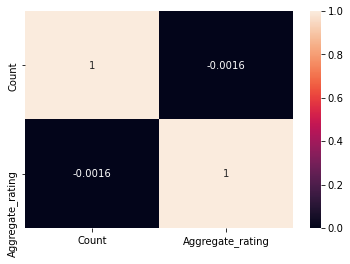

<AxesSubplot:xlabel='Count', ylabel='Aggregate_rating'>

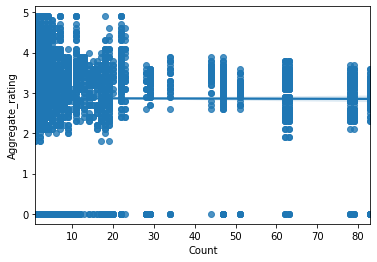

In [77]:
import seaborn as sns
corrMatrix = rest_rating[['Count', "Aggregate_rating"]].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
sns.regplot(x='Count',y='Aggregate_rating',data=rest_rating)

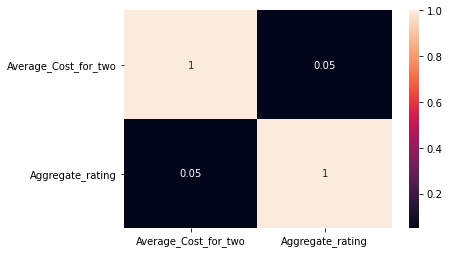

<AxesSubplot:xlabel='Average_Cost_for_two', ylabel='Aggregate_rating'>

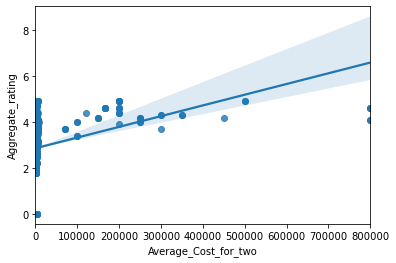

In [60]:
corrMatrix = rest_rating[["Average_Cost_for_two", "Aggregate_rating"]].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
sns.regplot(x='Average_Cost_for_two',y='Aggregate_rating',data=rest_rating)

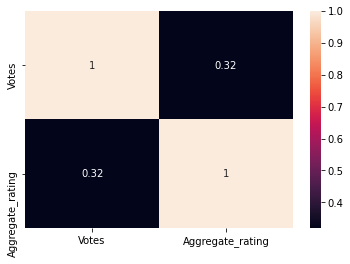

<AxesSubplot:xlabel='Votes', ylabel='Aggregate_rating'>

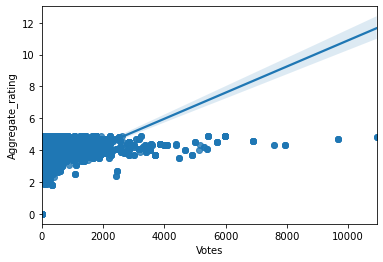

In [61]:

corrMatrix = rest_rating[["Votes", "Aggregate_rating"]].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
sns.regplot(x='Votes',y='Aggregate_rating',data=rest_rating)

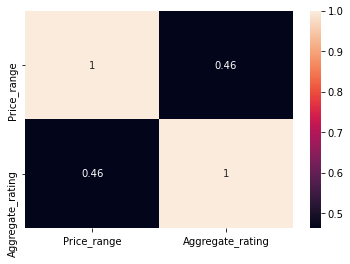

<AxesSubplot:xlabel='Price_range', ylabel='Aggregate_rating'>

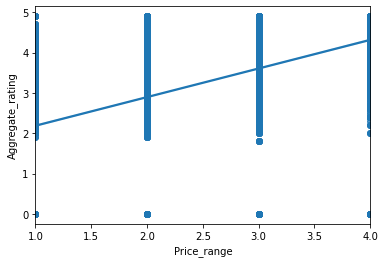

In [62]:
corrMatrix = rest_rating[["Price_range", "Aggregate_rating"]].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
sns.regplot(x='Price_range',y='Aggregate_rating',data=rest_rating)

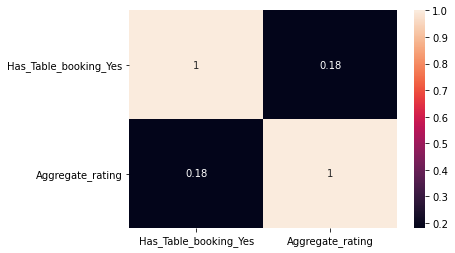

<AxesSubplot:xlabel='Has_Table_booking_Yes', ylabel='Aggregate_rating'>

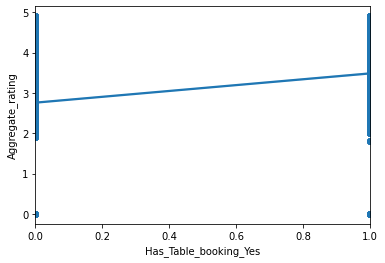

In [63]:
corrMatrix = rest_rating[["Has_Table_booking_Yes", "Aggregate_rating"]].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
sns.regplot(x='Has_Table_booking_Yes',y='Aggregate_rating',data=rest_rating)

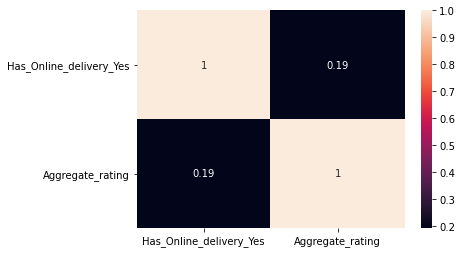

<AxesSubplot:xlabel='Has_Online_delivery_Yes', ylabel='Aggregate_rating'>

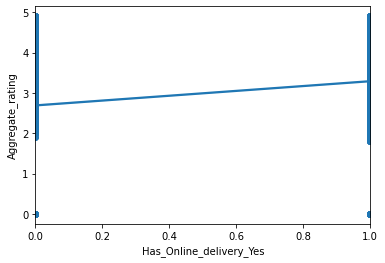

In [64]:

corrMatrix = rest_rating[["Has_Online_delivery_Yes", "Aggregate_rating"]].corr()
sns.heatmap(corrMatrix, annot=True)

plt.show()
sns.regplot(x='Has_Online_delivery_Yes',y='Aggregate_rating',data=rest_rating)

# We see that there is no single variable that affects the rating strongly, however table booking,online delivery,avg price for two and price range, number of votes do play a part in affecting the rating of a restaurant.